In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# import matplotlib.pyplot as plt
# # plt.imshow(x_train[0], cmap='gray')
# plt.title(f"Label: {y_train[0]}")
# plt.show()


In [4]:
# Normalize the data (scale pixel values to 0-1)
x_train, x_test = x_train / 255.0, x_test/255.0

In [5]:
# Build a simple CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 67ms/step - accuracy: 0.9151 - loss: 0.2823 - val_accuracy: 0.9828 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 67ms/step - accuracy: 0.9865 - loss: 0.0440 - val_accuracy: 0.9869 - val_loss: 0.0425
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 128s 68ms/step - accuracy: 0.9911 - loss: 0.0264 - val_accuracy: 0.9920 - val_loss: 0.0270
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9897 - val_loss: 0.0339
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 69ms/step - accuracy: 0.9954 - loss: 0.0157 - val_accuracy: 0.9905 - val_loss: 0.0317


In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy : ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9878 - loss: 0.0397
Test accuracy :  0.9904999732971191


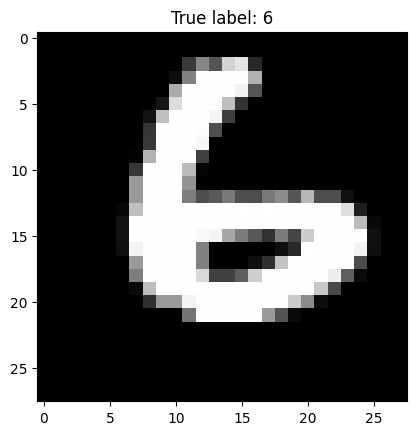

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Predicted label :  6


In [8]:
# Predict a random sample
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index], cmap='gray')
plt.title(f'True label: {y_test[index]}')
plt.show()

prediction = np.argmax(model.predict(x_test[index].reshape(1,28,28,1)))
print("Predicted label : ", prediction)

In [10]:
# Save the model to a file
model.save('mnist_digit_classifier_model.keras')